# DKNG Analysis

In [1]:
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
DKNG_1 = pd.read_csv("DKNG (2).csv")
DKNG_2 = pd.read_csv("DKNG (3).csv")
DKNG_3 = pd.read_csv("DKNG (4).csv")

In [3]:
#scaling DKNG_1 to 2023-2024 date scale
DKNG_1['Date'] = DKNG_1['Date'].str.replace('2021', '2023')
DKNG_1['Date'] = DKNG_1['Date'].str.replace('2022', '2024')

#scaling DKNG_2 to 2023-2024 date scale
DKNG_2['Date'] = DKNG_2['Date'].str.replace('2023', '2024')
DKNG_2['Date'] = DKNG_2['Date'].str.replace('2022', '2023')

# Changing 'Date' column in each df to datetime
DKNG_1['Date'] = pd.to_datetime(DKNG_1['Date'])
DKNG_2['Date'] = pd.to_datetime(DKNG_2['Date'])
DKNG_3['Date'] = pd.to_datetime(DKNG_3['Date'])

In [4]:
data_frames = [DKNG_1, DKNG_2, DKNG_3]
scaler = MinMaxScaler()

# Scaling the 'Close' column in each DataFrame individually
for df in data_frames:
    df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

Text(0, 0.5, 'Scaled Close')

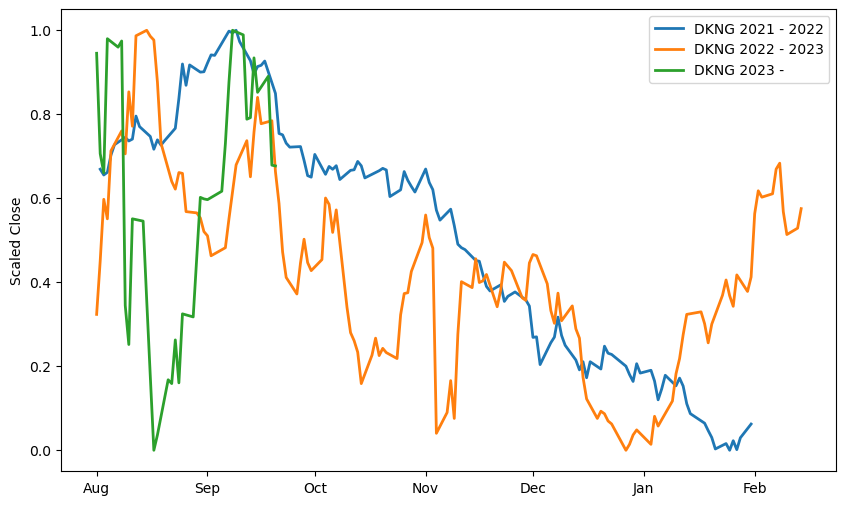

In [5]:
#plot 3 scaled dfs
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(DKNG_1['Date'], DKNG_1['Scaled_Close'], label='DKNG 2021 - 2022', linewidth=2)
ax.plot(DKNG_2['Date'], DKNG_2['Scaled_Close'], label='DKNG 2022 - 2023', linewidth=2)
ax.plot(DKNG_3['Date'], DKNG_3['Scaled_Close'], label='DKNG 2023 - ', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.legend()
ax.set_ylabel('Scaled Close')


C:\Users\schwa\AppData\Local\Temp\ipykernel_21328\930833234.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


<Axes: >

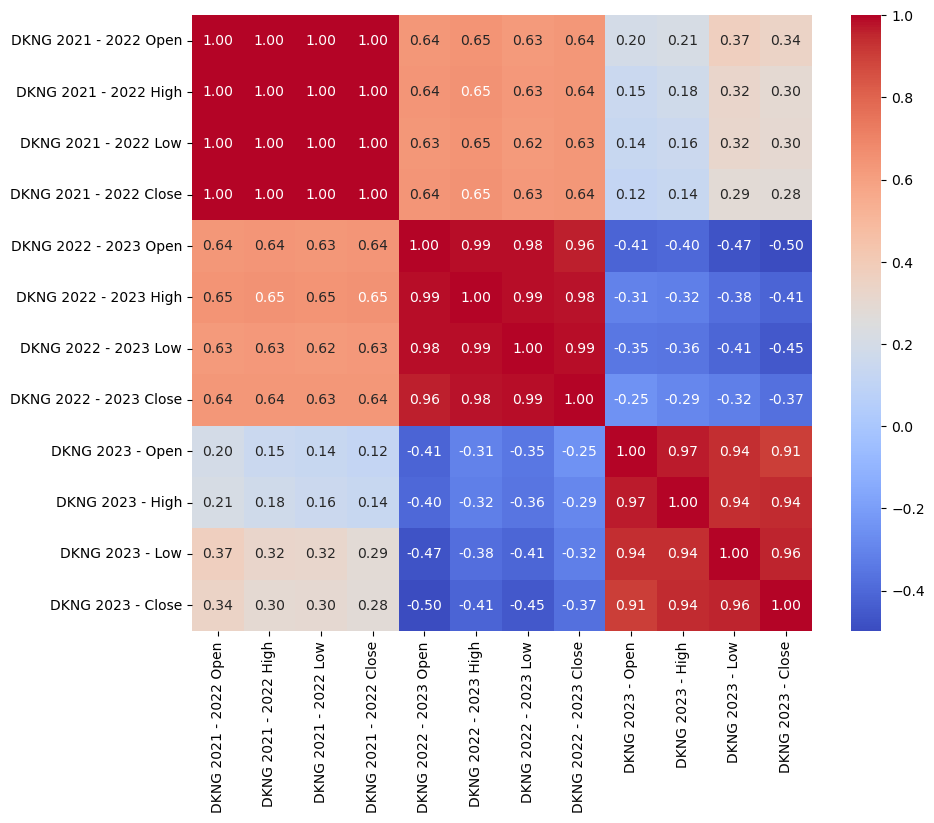

In [6]:
prefixes = ['DKNG 2021 - 2022 ', 'DKNG 2022 - 2023 ', 'DKNG 2023 - ']

# Iterate through the DataFrames and add prefixes to column names
for i, df in enumerate(data_frames):
    prefix = prefixes[i]
    df.columns = [prefix + col if col != 'Date' else col for col in df.columns]
    
combined_df = pd.concat([DKNG_1.iloc[:, :5], DKNG_2.iloc[:, :5], DKNG_3.iloc[:, :5]], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")